# **Pattern Recognition**

## Ioanna Stagona




In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

#k_means and silhouette coeff
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## **Άσκηση 1**

In [23]:
data = np.loadtxt('seeds_dataset.txt')

#seperate samples and labels
samples = data[:,:-1]
labels = data[:,-1]

#samples of each class
class_1_samples = samples[labels == 1]
class_2_samples = samples[labels == 2]
class_3_samples = samples[labels == 3]


### **Ερώτημα 1**

Παρακάτω θα απεικονίσουμε τους πίνακες αποστάσεων χρησιμοποιώντας την ευκλείδια και την cosine μετρική.

Η ομοιότητα cosine μετράει τη γωνία μεταξύ δύο διανυσμάτων στον χώρο, ανεξάρτητα από το μέγεθός τους. Χρησιμοποιείται για να υπολογίσει πόσο παρόμοια είναι δύο διανύσματα σε κατεύθυνση.

Η Ευκλείδεια απόσταση είναι η "παραδοσιακή" απόσταση μεταξύ δύο σημείων, όπως θα μετρούσαμε με ένα χάρακα, και λαμβάνει υπόψη την πραγματική απόσταση στον χώρο.

Η βασική τους διαφορά είναι ότι η ομοιότητα cosine εστιάζει στην κατεύθυνση και όχι στο μέγεθος, ενώ η Ευκλείδεια απόσταση μετρά την πραγματική απόσταση στον χώρο.


Ως πίνακας αποστάσεων ορίζεται ο πίνακας όπου περιέχει τις αποστάσεις του κάθε ενός στοιχείου απο όλα τα υπόλοιπα.




**O τύπος για τον υπολογισμό της ευκέιδιας απόστασης**

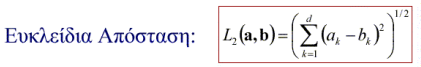



**Και ο τύπος για τον υπολογισμό της cosine :**



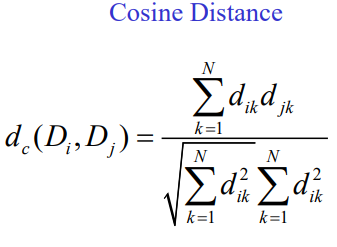



Ο πίνακας αποστάσεων καταγράφει τις αποστάσεις μεταξύ κάθε **ζευγαριού γραμμών**
του αρχικού πίνακα.

Για παράδειγμα, αν έχουμε N γραμμές στον αρχικό  πίνακα, ο πίνακας αποστάσεων θα είναι ένας τετράγωνος πίνακας διαστάσεων N×N, όπου κάθε κελί (i,j) θα αντιστοιχεί στην απόσταση μεταξύ της γραμμής i και της γραμμής j του αρχικού πίνακα.

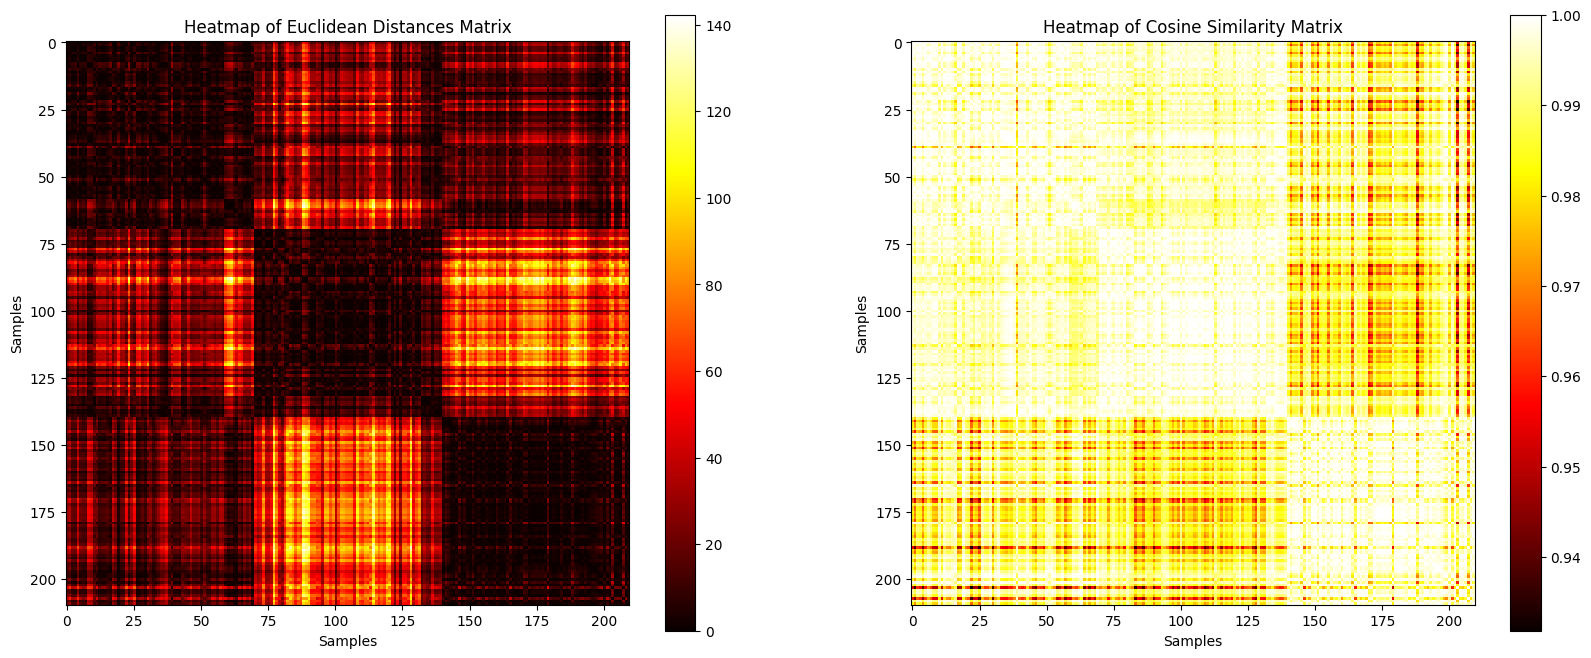

Class 1 shape : (70, 7)
Class 2 shape : (70, 7)
Class 3 shape : (70, 7)


In [26]:
#num of rows and num of cols
rows = samples.shape[0]
cols = samples.shape[1]

euclidean_distances = np.zeros((rows,rows))
cosine_similarity = np.zeros((rows,rows))
for i in range(rows):
    for j in range(rows):
      #euclidian distances Matrix
        euclidean_distances[i, j] = np.sum((samples[i, :] - samples[j, :]) ** 2)
      #cosine similarity Matrix
        dot_product = np.dot(samples[i, :], samples[j, :])
        norm_i = np.linalg.norm(samples[i, :])
        norm_j = np.linalg.norm(samples[j, :])
        cosine_similarity[i, j] = dot_product / (norm_i * norm_j)

#layout for the subplots
plt.figure(figsize=(20, 8))

# First subplot for the Euclidean distances
plt.subplot(1, 2, 1)
plt.imshow(euclidean_distances, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Euclidean Distances Matrix')
plt.xlabel('Samples')
plt.ylabel('Samples')

# Second subplot for the Cosine similarity
plt.subplot(1, 2, 2)
plt.imshow(cosine_similarity, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Cosine Similarity Matrix')
plt.xlabel('Samples')
plt.ylabel('Samples')

# Display the plots
plt.show()


#num of samples of each class
#this is for undestanding and explaining final results
class_1_shape=class_1_samples.shape
class_2_shape=class_2_samples.shape
class_3_shape=class_3_samples.shape

print("Class 1 shape :" ,class_1_shape)
print("Class 2 shape :" ,class_2_shape)
print("Class 3 shape :" ,class_3_shape)


Από την ανάλυση και των δύο θερμικών χαρτών, μπορούμε να προσδιορίσουμε ποιες κλάσεις μπορεί να είναι ευκολότερο να διαχωριστούν με βάση τα εξής κριτήρια:

**Συνοχή εντός της ίδιας κλάσης:** Κλάσεις που εμφανίζουν συνεκτικά σκοτεινά μπλοκ στον Ευκλείδειο θερμικό χάρτη δείχνουν ότι τα δείγματα είναι κοντά μεταξύ τους στον χώρο των χαρακτηριστικών, πράγμα που υποδηλώνει μια εσωτερική συνοχή της κλάσης.

**Διαχωριστικότητα μεταξύ των κλάσεων:**Μεγάλες Ευκλείδειες αποστάσεις μεταξύ διαφορετικών μπλοκ υποδηλώνουν ότι οι κλάσεις διαφέρουν σημαντικά μεταξύ τους.Δηλαδή, κλάσεις που είναι ευδιάκριτες με μπλοκ φωτεινότερων χρωμάτων μεταξύ τους στον Ευκλείδειο χάρτη δείχνουν ότι απέχουν απόσταση στον χώρο των χαρακτηριστικών, κάτι που κάνει το διαχωρισμό τους πιο εύκολο.

**Ομοιότητα κατεύθυνσης:** Φωτεινά μπλοκ στον cosine χάρτη δείχνουν δείγματα με παρόμοια κατεύθυνση χαρακτηριστικών. Αν αυτά τα φωτεινά μπλοκ συμπίπτουν με τα σκοτεινά μπλοκ του Ευκλείδειου χάρτη, αυτό ενισχύει την ένδειξη μιας καλά οριοθετημένης και συνεκτικής κλάσης.

**Ανομοιομορφία κατεύθυνσης:** Σκοτεινότερα μπλοκ στον cosine χάρτη δείχνουν δείγματα με διαφορετική κατεύθυνση χαρακτηριστικών, που μπορεί να αποτελούν διαφορετικές κλάσεις ή υποομάδες εντός μιας κλάσης.


Στον cosine χάρτη, η έλλειψη έντονης διάκρισης της διαφοράς φωτεινότητας μεταξύ της κλάσης 1 και 2 υποδηλώνει ότι τα δείγματα αυτών των δύο κλάσεων έχουν παρόμοια κατεύθυνση στον χώρο των χαρακτηριστικών, δηλαδή είναι παρόμοια από πλευράς προσανατολισμού.

Στον Ευκλείδειο χάρτη, η συσσώρευση των δειγμάτων σε τρεις σαφείς περιοχές υποδηλώνει ότι υπάρχουν τρεις διακριτές ομάδες, παρατηρούμε οτι σχηματίζεται μία διαγώνιος απο εξαιρετικά σκούρα μπλοκ , και αυτό δείχνει ότι τα δείγματα μιας κλάσης είναι παρόμοια μεταξύ τους (μικρές αποστάσεις).

Η κλάση 1 φαίνεται να είναι πιο κοντά στον ευκλείδιο χώρο με τις υπόλοιπες. Παρατηρούμε σχετικά σκούρα μπλοκ , και αναφορικά με τις αποστάσεις των δειγμάτων της 2ης κλάσης αλλά και με τα δείγματα της 3ης.
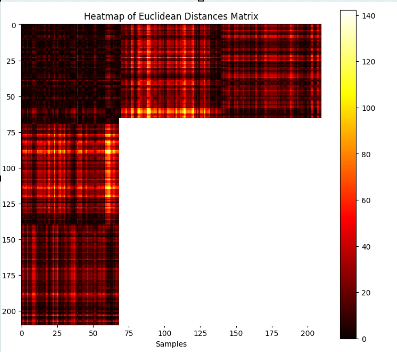

Αναφορικά με την 2η κλάση , παρατηρούμε ότι οι αποστάσεις της απο την κλάση 1 όπως αναφέραμε είναι σχετικά μικρες (σκούρα μπλοκ ) ενώ έντονη είναι η φωτεινότητα των μπλοκ που αναφαίρονται στις αποστάσεις με τα δείγματα της κλάσης 3.΄
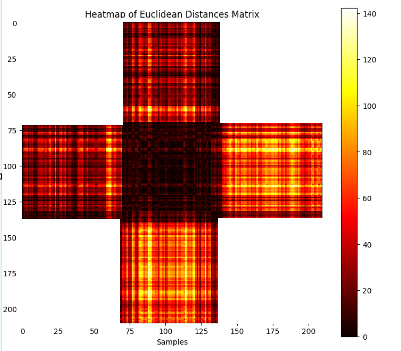

Τέλος , συμφωνα και με τα παραπάνω , η κλάση 3 φαίνεται να ομοιάζει με την κλάση 1 ( μικρές αποστάσεις στον ευκλείδιο χώρο - σχετικά σκούρα μπλοκ ) , ενώ οι αποστάσεις φαίνονται μεγαλύτερες (πιο φωτεινά μπλοκ) απο τα δείγματα της κλάσης 2.
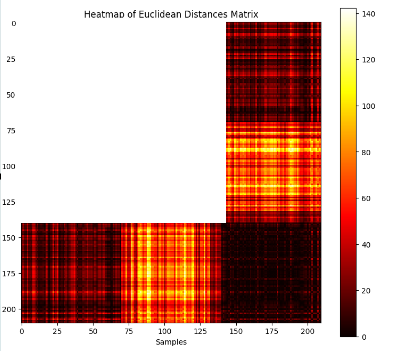

Σύμφωνα με όλα τα παραπάνω , οι κλάσεις 2 με την 3 φαίνεται να είναι οι πιο εύκολα διαχωρίσιμες μεταξύ τους ( μικρότερη ομοιότητα cosine και μεγαλύτερες αποστάσεις στον ευκλέιδιο χώρο ) . Αναφορικά με την πρώτη κλάση , φαίνεται να είναι πιο κόντα στον ευκλείδιο χώρο με την τρίτη κλάση  , αλλά πιο όμοια απο θέμα κατεύθυνσης με την 2η . Συνεπώς , όποια μετρική και να χρησιμοποιήσουμε , πιθανώς ο ταξινομητής να θεωρήσει προτιμότερο να δημιουργήσει 2 συστάδες αντί για 3 ( είτε συνενόνωντας την κλάση 1 με 3 στην ευκλείδια μετρική είτε συνενόνωντας την κλάση 1 με 2 χρησιμοποιώντας την cosine similarity )

### **Ερώτημα 2**




Ο k-means είναι ένας αλγόριθμος ομαδοποίησης που χωρίζει ένα σύνολο δεδομένων σε k διαφορετικές ομάδες (clusters) με βάση την ομοιότητα των δεδομένων. Ξεκινά με την τυχαία αρχικοποίηση των κέντρων των ομάδων και στη συνέχεια εκτελεί επαναληπτικές ενέργειες για να αναθέσει τα δείγματα στην πλησιέστερη ομάδα, με βάση την Ευκλείδεια απόσταση ή κάποια άλλη μετρική και ενημερώνει τα κέντρα των ομάδων μέχρι να συγκλίνει σε μια λύση.








Ο συντελεστής Silhouette μετράει πόσο καλά είναι τα δείγματα απομονωμένα σε διαφορετικές κλάσεις και πόσο συμπαγείς είναι οι κλάσεις . Ένας υψηλός συντελεστής Silhouette σημαίνει ότι οι κλάσεις είναι καλά διαχωρισμένες και ομοιογενείς . Υπολογίζεται αρχικά η μέση απόσταση(a) του δεδομένου από τα δεδομένα της ίδιας κλάσης ( συνοχή ) , καθώς επίσης η ελάχιστη μέση απόσταση (b)του δεδομένου από τα δεδομένα των υπολοίπων κλάσεων(διαχωρισιμότητα).

Το Silhouette Coefficient:

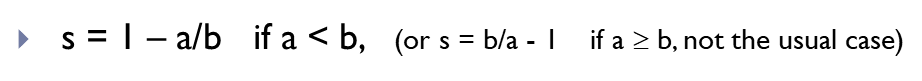


Όσο πιο κοντά η τιμή του στο 1 , τόσο το καλύτερο, καθώς αυτό σημαίνει ότι το δεδομένο είναι πολύ πιο κοντά στα δικά του σημεία στην ομάδα σε σχέση με τα αυτά των άλλων ομάδων, δηλαδή η ομάδα είναι συμπαγής και καλά διαχωρισμένη από τις υπόλοιπες.


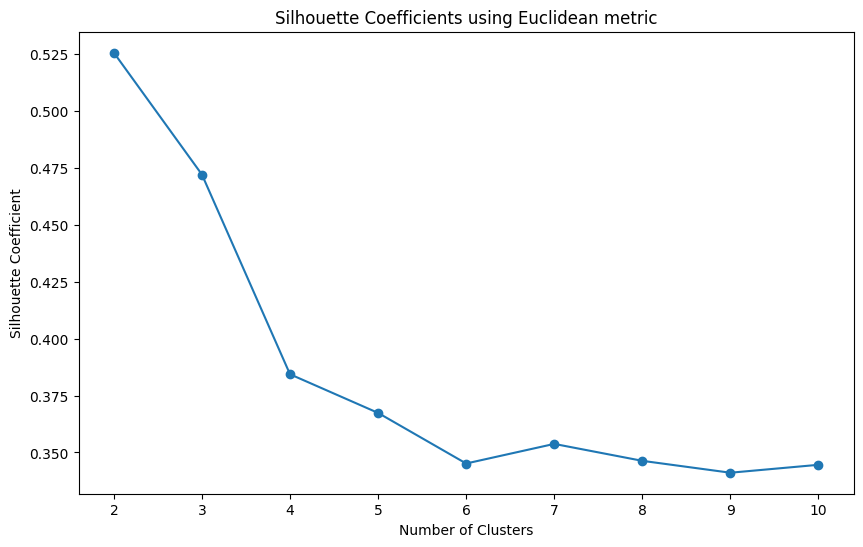

In [6]:
#Kmeans using Euclidean metric

# Initialize an array to store the silhouette coefficients for each number of clusters
silhouette_coefficients = {}

# Apply KMeans and calculate the silhouette coefficient for k from 2 to 10
for k in range(2, 11):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(samples)
    # Calculate the silhouette score and store it
    score = silhouette_score(samples, kmeans.labels_)
    silhouette_coefficients[k] = score

# Plot the silhouette coefficients for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_coefficients.keys()), list(silhouette_coefficients.values()), marker='o')
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficients using Euclidean metric')
plt.show()

​Yψηλότερο Silhouette Coefficient παρατηρείται όταν έχουμε k = 2 . Επιβεβαιώνεται λοιπόν το συμπέρασμα που βγάλαμε στο προηγούμενο ερώτημα , αναφορικά με την ομοιότητα των κλάσεων 1 και 3 στον ευκλείδιο χώρο . Ένας υψηλότερος συντελεστής Silhouette για k=2 υποδεικνύει ότι οι δύο ομάδες που έχουν δημιουργηθεί είναι σχετικά ξεκάθαρες και συμπαγείς, ενώ η απόσταση μεταξύ των ομάδων είναι σχετικά μεγάλη. Η τιμή του Silhouette είναι επίσης σχετικά υψηλή για k=3, αλλά όχι τόσο όσο για k=2, υποδεικνύει ότι μια από τις τρεις ομάδες δεν είναι τόσο καλά διαχωρισμένη από τις άλλες δύο, όπως αναλύσαμε στο προηγούμενο ερώτημα για την κλάση 1.

Όπως αναφέραμε , η αμέσως μεγαλύτερη τιμή του συντελεστή συναντάται όταν ο k - means ομαδοποιεί τα δεδομένα σε 3 κλάσεις ( όπως το ground truth )  απο εκεί και μετά η τιμή του πέφτει απότομα και καταλαβαίνουμε ότι η προσθήκη περισσότερων κλάσεων δεν βελτιώνει την ομαδοποίηση.




### **Ερώτημα 3**

Η κανονικοποίηση των δεδομένων σε μηδενική μέση τιμή και μοναδιαία διακύμανση είναι μια συχνή πρακτική στην προ-επεξεργασία δεδομένων για αλγόριθμους μηχανικής μάθησης και στοχεύει να εναρμονίσει τη συμβολή των χαρακτηριστικών, ανεξαρτήτως της αρχικής τους κλίμακας. Αυτό βοηθά στην αποφυγή περιπτώσεων όπου χαρακτηριστικά με μεγάλες αριθμητικές τιμές επηρεάζουν δυσανάλογα το αποτέλεσμα και βελτιώνει τη σταθερότητα και την αποδοτικότητα των αλγορίθμων.

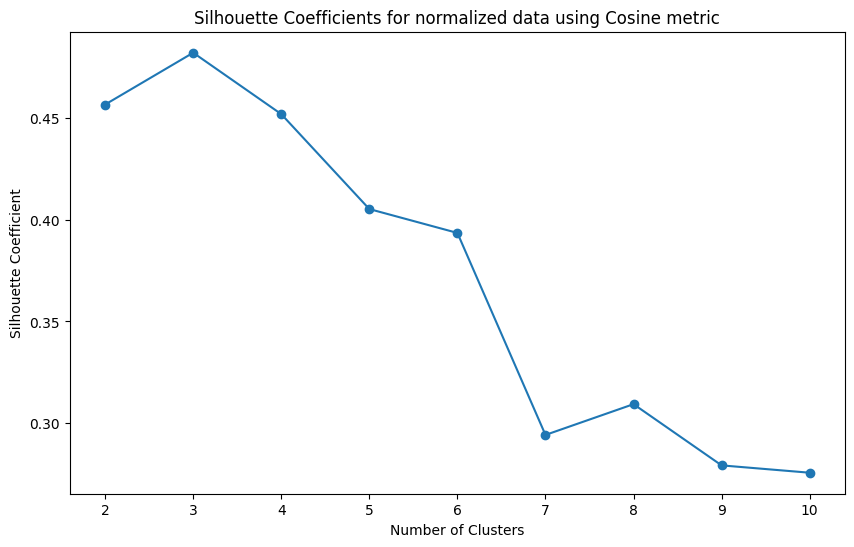

In [27]:
# Normalize features to zero mean and unit variance
mu = np.mean(samples, axis=0)
sigma = np.std(samples, axis=0)
norm_samples = np.zeros_like(samples)

for i in range(1, cols):
    norm_samples[:, i] = (samples[:, i] - mu[i]) / sigma[i]

#Normalize features into unit length - for aproaching cosine similarity
length = np.sqrt((norm_samples**2).sum(axis=1))[:,None]
Sn = (norm_samples)/length

# Initialize an array to store the silhouette coefficients for each number of clusters
silhouette_coefficients = {}

# Apply KMeans and calculate the silhouette coefficient for k from 2 to 10
for k in range(2, 11):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Sn)
    # Calculate the silhouette score and store it
    score = silhouette_score(Sn, kmeans.labels_)
    silhouette_coefficients[k] = score

# Plot the silhouette coefficients for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_coefficients.keys()), list(silhouette_coefficients.values()), marker='o')
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficients for normalized data using Cosine metric')
plt.show()

Στο 2o διάγραμμα με την Cosine μετρική, παρατηρούμε ότι ο υψηλότερος συντελεστής Silhouette εμφανίζεται για k=3. Αυτό σημαίνει ότι, όταν τα δεδομένα κανονικοποιηθούν και χρησιμοποιηθεί η Cosine μετρική για τoν υπολογισμό των αποστάσεων, οι συστάδες που προκύπτουν για τρεις κλάσεις είναι πιο συμπαγείς και καλύτερα διαχωρισμένες σε σχέση με άλλο αριθμό κλάσεων. Αυτό είναι συμβατό με το γεγονός ότι ο σωστός αριθμός κλάσεων (ground truth) είναι ίσος με 3.


Η κανονικοποίηση των δεδομένων ώστε κάθε χαρακτηριστικό να έχει μηδενική μέση τιμή και μοναδιαία τυπική απόκλιση (variance) βοηθάει να καταστούν τα διάφορα χαρακτηριστικά συγκρίσιμα. Αυτό σημαίνει ότι κανένα χαρακτηριστικό δεν θα επικρατήσει έναντι των άλλων λόγω της διαφορετικής μονάδας μέτρησης ή της μεγάλης διασποράς των τιμών του.H cosine μετρική έχει καλύτερα αποτελέσματα όταν η ταξινόμηση γίνεται με βάση την συχνότητα εμφάνισης χαρακτηριστικών.

Συμπερασματικά, η κανονικοποίηση βοηθά στην ενίσχυση της ομοιότητας με βάση την κατεύθυνση των διανυσμάτων και καθιστά την Cosine μετρική πιο αποτελεσματική για την ομαδοποίηση κανονικοποιημένων δεδομένων.

Στην πρώτη περίπτωση που δεν πραγματοποιείται η κανονικοποίηση των δεδομένων χαρακτηριστικά με μεγάλες τιμές επιδρούν πολύ περισσότερο στην συνάρτηση κόστους, παρόλο που αυτό μπορεί να μην αντικατροπρίζει την σπουδαιότητα τους στην σχεδίαση του ταξινομητή.

Συνοψίζοντας, η Cosine μετρική φαίνεται να είναι η πιο κατάλληλη για το συγκεκριμένο σετ έπειτα απο κανονικοποοίηση των δεδομένων, καθώς ο συντελεστής Silhouette επιβεβαιώνει την ύπαρξη τριών φυσικών κλάσεων.








### **Ερώτημα 4**

Το Rand index υπολογίζεται ανάμεσα σε 2 κατηγοριοποιήσεις και συγκρίνεται η σχέση μεταξύ σημείων και κλάσεων .
Χωρίζεται σε 2 σημεία .


*   **a** : τα σημεία που και στα 2 clustering ανήκουν στην ίδια κλάση
*   **b** : τα σημεία που και στα 2 clustering δεν ανήκουν στην ίδια κλάση
Όσα περισσότερα σημεία a, b βρω τόσο καλύτερα έχει πετύχει ο διαχωρισμός με τον αλγόριθμο k - means μιας και κατηγοριοποίηση που θα συγκρίνω αποτελεί την ground truth .

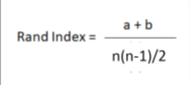


In [29]:
from sklearn.metrics.cluster import rand_score

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(samples)
kmeans_labels = kmeans.labels_
rand_index_kMeans = rand_score(kmeans_labels, labels)

#print the results ( using random_state = 42 as the previous questions)
print(f"Το αρχικό Rand Index χρησιμοποιώντας k-Means είναι: {rand_index_kMeans:.3f}")


#KMeans clustering for 5 times with random cluster center initializing
rand_index = np.zeros(5)
for i in range(1,6):
    kmeans = KMeans(n_clusters=3, n_init='auto', random_state=i)
    kmeans.fit(samples)
    kmeans_labels = kmeans.labels_
    rand_index[i-1] = rand_score(kmeans_labels, labels)


#calculate mu and variance
mu_rand_index = np.mean(rand_index)
var_rand_index = np.var(rand_index)

print(f"Η μέση τιμή του Rand Index για 5 επαναλήψεις με τυχαία αρχικοποίηση κέντρων είναι: {mu_rand_index:.3f}")
print(f"Το variance του Rand Index είναι: {var_rand_index:.8f}")

Το αρχικό Rand Index χρησιμοποιώντας k-Means είναι: 0.874
Η μέση τιμή του Rand Index για 5 επαναλήψεις με τυχαία αρχικοποίηση κέντρων είναι: 0.874
Το variance του Rand Index είναι: 0.00000145


### **Ερώτημα 5**

Θα επαναλάβουμε το ίδιο χρησιμοποιώντας cosine μετρική, ή αντίστοιχα ευκλίδεια μετρική με τα δεδομένα να είναι κανονικοποιήμενα σε μοναδιαίο μήκος.

In [32]:

#Normalize features into unit length - for aproaching cosine similarity
length = np.sqrt((samples**2).sum(axis=1))[:,None]
Sn = (samples)/length


# Perform KMeans clustering for normalized data
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(Sn)
kmeans_labels = kmeans.labels_
norm_rand_index = rand_score(kmeans_labels, labels)

#print the results ( using random_state = 42 as the previous questions)
print(f"Το αρχικό Rand Index είναι: {norm_rand_index:.3f}")


#KMeans clustering for 5 times with random cluster center initializing
rand_index = np.zeros(5)
for i in range(1,6):
    kmeans = KMeans(n_clusters=3, n_init='auto', random_state=i)
    kmeans.fit(Sn)
    kmeans_labels = kmeans.labels_
    rand_index[i-1] = rand_score(kmeans_labels, labels)

mu_rand_index_norm = np.mean(rand_index)
var_rand_index_norm = np.var(rand_index)

print(f"Η μέση τιμή του Rand Index χρησιμοποιώντας cosine μετρική είναι: {mu_rand_index_norm:.3f}")
print(f"Το variance του Rand Index χρησιμοποιώντας cosine μετρική είναι: {var_rand_index_norm:.8f}")

Το αρχικό Rand Index είναι: 0.782
Η μέση τιμή του Rand Index χρησιμοποιώντας cosine μετρική είναι: 0.684
Το variance του Rand Index χρησιμοποιώντας cosine μετρική είναι: 0.00001835


Η μετρική cosine φαίνεται να επιτυγχάνει μια ομαδοποίηση που είναι λιγότερο πιστή στις πραγματικές ομάδες των δεδομένων, καθώς έχει χαμηλότερο μέσο Rand Index (0.684 έναντι 0.874). Η τιμή του variance δείχνει την διακύμανση στις τιμές του Rand Index που προκύπτουν από διαφορετικές αρχικοποιήσεις των κέντρων των κλάσεων στον K-Means. Ένα μικρότερο variance υποδηλώνει ότι ο αλγόριθμος είναι λιγότερο ευαίσθητος στην αρχικοποίηση και παρέχει πιο συνεπείς αποτελέσματα. Και στις 2 περιπτώσεις,  τα variance είναι πολύ χαμηλά ( σχεδόν 0 ), αλλά το variance για την cosine μετρική είναι ελαφρώς υψηλότερο, πράγμα που υποδεικνύει μια μικρή αύξηση στην ευαισθησία αναφορικά με την αρχικοποίηση των συστάδων. Ωστόσο καθώς οι τιμές και στις 2 μετρικές είναι εξαιρετικά χαμηλές, το τελευταίο δεν λαμβάνεται υπ όψιν ως κριτίριο εύρεσης της βέλτιστης μετρικής.

Συνεπώς, εάν δεν χρησιμοποιόυμε κανονικοποιημένα δεδομένα , επιλέγεται ως καλύτερη μετρική η ευκλείδια , μιας και μας δίνει το υψηλότερο μέσο Rand Index .


### **Ερώτημα Bonus**

Για να βελτιστοποιήσουμε τον k - NN θα πρέπει να κάνουμε ένα αρχικό pre - proccess στα data. Θα μπορούσαμε να χρησιμοποιήσουμε τον αλγόριθμο k-Means στα αρχικά data. Για να βρούμε τον κατάλληλο αριθμό κλάσεων για την μέθοδο του k means μπορούμε να εφαρμόσουμε την τακτική που ακολουθήσαμε στην άσκηση. Για παράδειγμα, να δοκιμάσουμε διάφορες τιμές ( πχ απο k = 2 έως 10 ) ,  και να βρούμε την βέλτιστη τιμή σύμφωνα με το silhouette coefficient. Στην συνέχεια θα αποθηκεύσουμε σε έναν πίνακα τα κέντρα των κλάσεων .

Κατά την εφαρμογή του k - NN , για κάθε ένα sample θα πάρουμε τις αποστάσεις από τα κέντρα των κλάσεων που έχουν δημιουργηθεί , αντί να πάρουμε τις αποστάσεις από κάθε ένα σημείο των συνολικών χαρακτηριστικών . Εντός της πλησιέστερης κλάσης, θα πάρουμε τις πραγματικές ετικέτες απο τα σημεία που την αποτελούν και απο εκεί θα προσδιορίσουμε την ετικέτα του εκάστοτε σημείου . Έτσι , ο αλγόριθμος k - NN θα εφαρμοστεί σε μία πολύ μικρότερη γειτονιά και θα περιορίσουμε τον φόρτο εργασίας του.



Παρακάτω παρουσιάζουμε μια μορφή του ψευδοαλγόριθμου

1.   Εισαγωγή δεδομένων
2.   Εύρεση βέλτιστου αριθμού κλάσεων για K-Means

      Για k από 2 έως 10:
    *   Εκπαίδευση K-Means με k κλάσεις
    *   Υπολογισμός Silhouette Coefficient

  Επιλογή του k με τον υψηλότερο Silhouette Coefficient


3.   Εκπαίδευση K-Means με το επιλεγμένο k
4.   Αποθήκευση κέντρων των συστάδων σε έναν πίνακα centers

5.  Για κάθε δείγμα στο data set:

    *   Υπολογισμός αποστάσεων από τα κέντρα των κλάσεων
    *   Εύρεση της πλησιέστερης κλάσης
    *   Εφαρμογή k-NN μόνο στα δείγματα της πλησιέστερης κλάσης για να βρεθεί η ετικέτα
    *    Ανάθεση της προβλεπόμενης ετικέτας
    








## **Άσκηση 2**

Η ιεραρχική ομαδοποίηση είναι μια μέθοδος συσταδοποίησης που αναπτύσσει ένα δέντρο αποφάσεων από τα δεδομένα, γνωστό ως δενδρόγραμμα.

Οι αλγόριθμοι ομαδοποιήσης παράγουν μία ιεραρχία εμφωλιασμένων ομαδοποιήσεων,  περιλαμβάνουν Ν βήματα , όσα δηλαδή είναι τα διανύσματα του Dataset. Εάν 2 διανύσματα βρεθούν στην ίδια ομάδα σε κάποιο ιεραρχικό επίπεδο , θα παραμείνουν στην ίδια ομάδα για όλες τις επόμενες ομαδοποιήσεις. Σε κάθε βήμα παράγεται μία νέα ομαδοποίηση η οποία προκύπτει απο το προηγούμενο βήμα.

Η μέθοδος που θα επιλέξω είναι η agglomerative clustering, η οποία είναι μια "από τα κάτω προς τα πάνω" προσέγγιση. Σε αυτή την τεχνική, κάθε δείγμα ξεκινά ως δική του συστάδα και στη συνέχεια, σε κάθε βήμα, οι δύο πιο κοντινές συστάδες συνδυάζονται μέχρι να φτάσουμε σε μια ενιαία συστάδα που περιλαμβάνει όλα τα δείγματα.  Οι παράμετροι που χρησιμοποιούνται  περιλαμβάνουν τη μετρική απόστασης (π.χ., Ευκλείδεια, Cosine) και τη μέθοδο linkage, η οποία καθορίζει τον τρόπο υπολογισμού της απόστασης μεταξύ των συστάδων (π.χ. Min, Max, Ward, Average).

Μέθοδοι linkage :

*   Min : Καλύτερο σε μη ελλιπτικά σχήματα (Single Linkage)
*   Max : όχι τόσο ευσαίσθητο σε θόρυβο και outliers ( Complete Linkage )
*   Group  average : λιγότερο ευαίσθητο στο noise , δημιουργόυνται πιο σφαιρικά σχήματα (Average Linkage )

*   Ward : Παρόμοια με την Group Linkage οταν χρησιμοποιείται squared ευκλείδια.


Θα επιλέξω την τετραγωνική ευκλείδια μετρική καθώς επίσης το group average ως linkage μέθοδο.


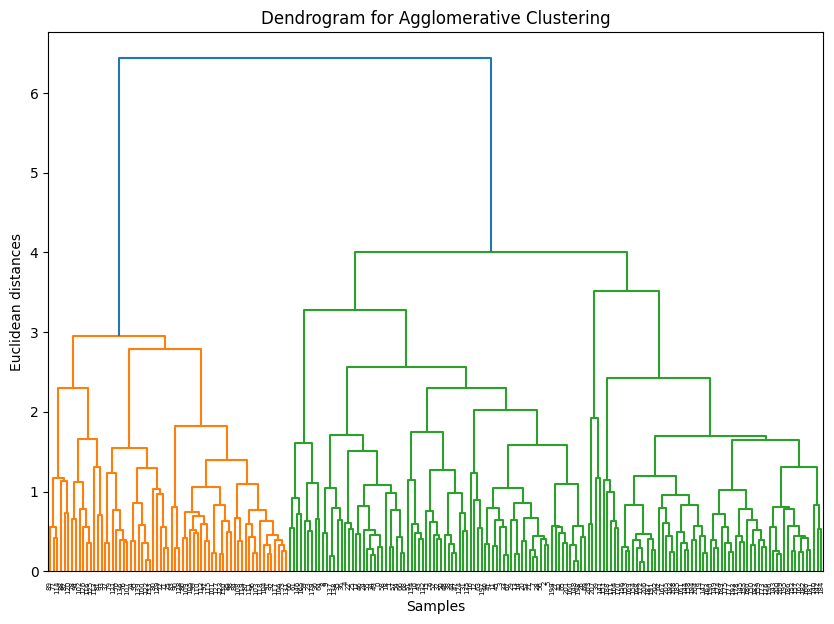

The number of clusters found in the algorithm: 2


In [39]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


# Agglomerative Clustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='average')
cluster_labels = clustering.fit_predict(samples)

# Dendrogramm
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(samples, method='average'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()
print("The number of clusters found in the algorithm:",clustering.n_clusters_)

Στο δενδρόγραμμα, κάθε κάθετη γραμμή αντιπροσωπεύει μια σύνδεση μεταξύ δύο κόμβων (δειγμάτων ή ήδη υπάρχουσας ομάδας δειγμάτων), και το ύψος της γραμμής αντιπροσωπεύει την απόσταση στην οποία έγινε η συγχώνευση. Με άλλα λόγια, το ύψος της γραμμής δείχνει πόσο διαφορετικά είναι τα δεδομένα που συγχωνεύονται.

Από το δενδρόγραμμα μπορούμε να δούμε τα εξής:

*   Οι συγχωνεύσεις που συμβαίνουν σε χαμηλότερα επίπεδα (πιο κοντά στο μηδέν) αντιπροσωπεύουν δείγματα ή ομάδες που είναι πολύ παρόμοια μεταξύ τους.
*   Οι συγχωνεύσεις που συμβαίνουν σε υψηλότερα επίπεδα αντιπροσωπεύουν ομάδες που είναι λιγότερο παρόμοιες μεταξύ τους.

Στο παραπάνω δενδρόγραμμα γίνονται  διακριτές οι 3 κλάσεις , καθώς παρατηρούμε 3 βασικές διακλαδώσεις, με την κάθε μια να αντιστοιχεί σε μία κλάση. Ωστόσο παρατηρούμε ότι οι 2 κλάσεις (η 1 και η 2) είναι αρκετά όμοιες μεταξύ τους , καθώς μετά απο ένα σημείο ενώνονται ώς μία με μικρό ύψος κάθετης γραμμής, σε αντίθεση με την 3η που απλά ενώνεται τελικά στο υπόλοιπο σύνολο δεδομένων.

Τελικά ο ιεραρχικός αλγόριθμος αναγνωρίζει 2 κλάσεις ως τη βέλτιστη λύση, όπως και ο k-Means χρησιμοποιώντας ευκλείδια μετρική.

In [40]:
# Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='average')
cluster_labels = clustering.fit_predict(samples)

rand_index_AC = rand_score(cluster_labels, labels )

print(f"Το Rand Index χρησιμοποιώντας k-Means με cosine μετρική είναι: {norm_rand_index:.3f}")
print(f"Το Rand Index χρησιμοποιώντας k-Means με euclidean μετρική είναι: {rand_index_kMeans:.3f}")
print(f"Το Rand Index χρησιμοποιώντας Agglomerative Clustering είναι: {rand_index_AC:.3f}")

Το Rand Index χρησιμοποιώντας k-Means με cosine μετρική είναι: 0.782
Το Rand Index χρησιμοποιώντας k-Means με euclidean μετρική είναι: 0.874
Το Rand Index χρησιμοποιώντας Agglomerative Clustering είναι: 0.886


Το Agglomerative Clustering έχει το υψηλότερο Rand Index (0.886), το οποίος είναι ακόμα υψηλότερο από αυτό του k-Means με Ευκλείδεια μετρική. Αυτό υποδηλώνει ότι στην περίπτωση μας ένας αλγόριθμος ιεραρχικής ομαδοποίησης, είναι ο πιο κατάλληλος για την ανάλυση αυτού του συγκεκριμένου σετ δεδομένων, παράγοντας πιο ομοιογενείς και καλά ορισμένες ομάδες.

**Πλεονεκτήματα των Ιεραρχικών Τεχνικών Ομαδοποίησης**



1.   **Δεν χρειάζεται εκ των προτέρων ορισμός αριθμού συστάδων:** Σε αντίθεση με τον K-Means, η ιεραρχική ομαδοποίηση δεν απαιτεί να ορίσουμε τον αριθμό των συστάδων πριν από την εφαρμογή της. Αυτό προσφέρει μεγαλύτερη ευελιξία και επιτρέπει την ανακάλυψη της δομής των δεδομένων κατά τη διαδικασία.

2.   **Προσδιορισμός Ιεραρχίας**: Οι αλγόριθμοι αυτού του έιδους προσδιορίζουν μία ολόκληρη ιεραρχία ομαδοποιήσεων αντί για μόνο μία ομαδοποίηση

3.   **Οπτικοποίηση με Δενδρογράμματα:** Τα δενδρογράμματα προσφέρουν μια άμεση οπτική αναπαράσταση της διαδικασίας ομαδοποίησης, απεικονίζοντας πώς τα διάφορα δείγματα ή συστάδες συνδυάζονται σε υψηλότερα επίπεδα..

4.   **Ευελιξία στην Επιλογή Μετρικών**: Η ιεραρχική ομαδοποίηση μπορεί να χρησιμοποιήσει διάφορες μετρικές απόστασης και μεθόδους linkage, γεγονός που την κάνει κατάλληλη για διάφορους τύπους δεδομένων.Ενώ ο K-Means απαιτεί την Ευκλείδεια μετρική, η ιεραρχική ομαδοποίηση μπορεί να εφαρμοστεί σε δεδομένα .







*Σημείωση : Σε περίπτωση που στα ερωτήματα 4 και 5 χρησιμοποιούσαμε κανονικοποιημένα δεδομένα η χρήση του k - Means με cosine μετρική ήταν αυτή που μας παρείχε τα καλύτερα αποτελέσματα , με την μέση τιμή του Rand Index να φτάνει το 0.91 !*

## **Άσκηση 3**


### **Ερώτημα 1**

**Principal Components Analysis (PCA)**

Η PCA υπολογίζεται ως εξής :    


1.   Παίρνω τα δεδομένα μου
2.   Αφαιρώ την μέση τιμή
3.   Βρίσκω τον πίνακα συνδιακύμανσης
4.   Κάνω ιδιοανάλυση του covariance matrix
5.   Επιλέγω τόσα ιδιοδιανύσματα όσες και οι διαστάσεις που θέλω να φτάσω .




Στον πίνακα προβολής , κάθε γραμμή αντοπροσωπέυει μια κύρια συνιστώσα  .Οι κύριες συνιστώσες (principal components) είναι νέες μεταβλητές που δημιουργούνται από την αρχική συνδυαστική πληροφορία των δεδομένων σε έναν χαμηλότερο διαστημικό χώρο, χωρίς να χάνεται σημαντική πληροφορία. Οι κύριες αυτές συνιστώσες είναι οι διαστάσεις που κατέχουν τη μέγιστη δυνατή διακύμανση (variance) από τα δεδομένα. Η πρώτη γραμμή του πίνακα περιέχει τα features με το μεγαλύτερο variance, δηλαδή τα πιο σημαντικά.

Οι τιμές των ιδιοδιανυσμάτων στον πίνακα explained variance υποδηλώνουν το ποσοστό της συμβολής της κάθε συνιστώσας στην διακύμανση.


Θέλουμε να επιλέξουμε τον ελάχιστο αριθμό διαστάσεων d έτσι ώστε το άθροισμα των d ιδιοτιμών προς το άθροισμα των συνολικών ιδιοτιμών να είναι αρχικά 0.9 και έπειτα 0.99 . Γι αυτό θα χρειαστεί να υπολογίσουμε το συνολικό variance καθώς επίσης το συσσωρευτικό άθροισμα του πίνακα explained_variance. Δηλαδή στον νέο πίνακα **cumulative_variance** το συσσωρευτικό άθροισμά τους θα είναι η αθροιστική τιμή αυτών των ιδιοτιμών καθώς προσθέτεται η μία μετά την άλλη.

Παράδειγμα:

*   cumulative_variance[0] = explained_variance[0]
*   cumulative_variance[1] = explained_variance[0] + explained_variance[1]

και πάει λέγοντας .

Έτσι στον πίνακα θα εμφανίζεται κατα σειρά η συμμετοχή στο variance μόνο του πρώτου principal component, η αθροιστική συμμετοχή του 1ου και του 2ου principal component , κλπ.

Eπιλέγω να χρησιμοποιήσω τα κανονικοποιημένα δεδομένα μιας και η PCA αλλά και η LDA είναι αρκετά ευαίσθητες στην κλίμακα των data.

In [43]:
from sklearn.decomposition import PCA

pca = PCA()
mapped = pca.fit_transform(norm_samples) # returns the visualizations of the data (7D)
projection_matrix  = pca.components_
#print the projection matrix
print("Projection matrix: \n",projection_matrix)

explained_variance = pca.explained_variance_
#print the explained variance
print("Εplained variance: \n",explained_variance)

total_variance = np.sum(explained_variance)
#print the total variance
print("Total variance: \n",total_variance)

cumulative_variance = np.cumsum(explained_variance)
#print the cumulative sum
print("Cumulative Variance: \n",cumulative_variance)

p = np.zeros(len(explained_variance))


#more complex calculation

#initialize variables
# componentsfor_90 = 0
# componentsfor_99 = 0

# for i in range(len(explained_variance)):
#     p[i] = cumulative_variance[i] / total_variance
#     if (p[i] >= 0.9 and componentsfor_90 == 0):
#       componentsfor_90 = i + 1
#       print("Components needed for representing 90%:" , componentsfor_90)
#     if (p[i] >= 0.99 and componentsfor_99 == 0):
#       componentsfor_99 = i + 1
#       print("Components needed for representing 99%:" , componentsfor_99)



Projection matrix: 
 [[ 0.          0.49176877  0.31109191  0.47204365  0.48270437 -0.13831589
   0.43176997]
 [-0.         -0.09312133  0.52420612 -0.21511427  0.10809466 -0.71386047
  -0.38598055]
 [-0.         -0.05242452  0.63389708 -0.20431794  0.22357912  0.67914944
  -0.20603097]
 [ 0.          0.34278646 -0.30450755  0.33127703  0.24801928  0.09173588
  -0.7810884 ]
 [-0.          0.22962644 -0.33569304 -0.70704646  0.5672668  -0.03573522
   0.10769659]
 [ 0.          0.75928434  0.14556642 -0.28194976 -0.56746738  0.01831701
  -0.02114957]
 [ 1.          0.          0.          0.          0.          0.
   0.        ]]
Εplained variance: 
 [4.05818749 1.20216438 0.68066108 0.06561837 0.01788236 0.00419447
 0.        ]
Total variance: 
 6.028708133971288
Cumulative Variance: 
 [4.05818749 5.26035187 5.94101295 6.00663131 6.02451367 6.02870813
 6.02870813]
Components needed for representing 90%: 3
Components needed for representing 99%: 4



Επεξήγηση της παρακάτω υλοποίησης

**np.where(p >= 0.90) και np.where(p >= 0.99)**: Αυτή η συνάρτηση επιστρέφει τους δείκτες των στοιχείων του πίνακα p που ικανοποιούν τη συνθήκη (δηλαδή, είναι μεγαλύτερα ή ίσα με 0.90 ή 0.99).

**[0][0]**: Η συνάρτηση np.where επιστρέφει ένα tuple των arrays. Σε αυτή την περίπτωση, ενδιαφερόμαστε μόνο για το πρώτο array , δηλαδή τους πρώτους δείκτες που ικανοποιούν την συνθήκη.


In [42]:

#simpler calculation
p = cumulative_variance/ total_variance
#print(p)


componentsfor90 = np.where(p >= 0.90)[0][0] + 1
componentsfor99 = np.where(p >= 0.99)[0][0] + 1

print("Components needed for representing 90%:" , componentsfor90)
print("Components needed for representing 99%:" , componentsfor99)

Components needed for representing 90%: 3
Components needed for representing 99%: 4


Στην περίπτωσή μας, για να αναπαραστήσουμε το 90% της συνολικής διακύμανσης των αρχικών δεδομένων, χρειάζόμαστε 3 κύριες συνιστώσες. Αυτό σημαίνει ότι τρεις διαστάσεις είναι αρκετές για να κρατήσουν το 90% της πληροφορίας του αρχικού σετ δεδομένων.

Για να αναπαραστήσουμε το 99% της συνολικής διακύμανσης, χρειάζονται 4 κύριες συνιστώσες. Αυτό υποδηλώνει ότι με την προσθήκη μίας ακόμη διάστασης στο μοντέλο σας, μπορούμε να ενσωματώσετε επιπλέον 9% της πληροφορίας που υπάρχει στα δεδομένα, φτάνοντας πολύ κοντά στην πλήρη αναπαράσταση της αρχικής διακύμανσης με μεγάλη ακρίβεια.

### **Ερώτημα 2**
Το σφάλμα ανακατασκευής υπολογίζεται προβάλλοντας τα δεδομένα στις κύριες συνιστώσες και μετά ανακατασκευάζοντας τα πίσω στον αρχικό χώρο διαστάσεων.Aναφέρεται δηλαδή στη διαφορά μεταξύ των αρχικών δεδομένων και της ανακατασκευής τους μετά την εφαρμογή της PCA. Αυτό γίνεται για 1 έως 7 κύριες συνιστώσες και το αντίστοιχο σφάλμα ανακατασκευής για κάθε περίπτωση αποτυπώνεται σε ένα διάγραμμα.

The reconstruction errors matrix is : 
 [0.28016245896127584, 0.10924248934350946, 0.01246822727608786, 0.003138813312279481, 0.0005963560055007095, 1.3206256553009026e-30, 1.3206256553009026e-30]


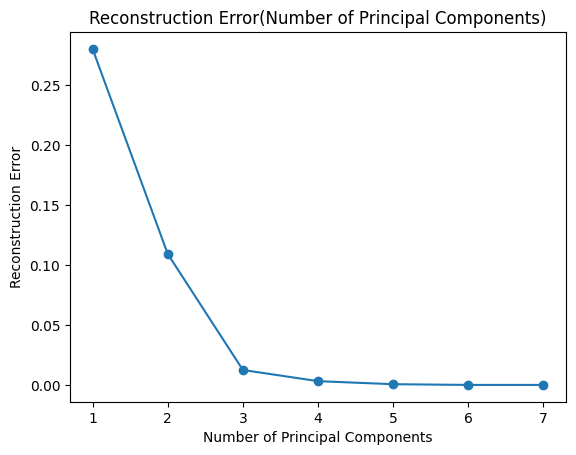

In [13]:
#Reconstruction error for PCA
reconstruction_errors = []
for n_components in range(1, 8):
   # Reduce the dataset to 'n_components' dimensions
    pca = PCA(n_components=n_components)
    mapped = pca.fit_transform(norm_samples)
    # Reconstruct the dataset from the reduced dimensions
    reconstructed = pca.inverse_transform(mapped)
    # Calculate the mean squared reconstruction error
    error = np.mean(np.square(norm_samples - reconstructed))
    # Calculate reconstruction errors for components 1 to 7
    reconstruction_errors.append(error)

print("The reconstruction errors matrix is : \n", reconstruction_errors)
#plot the Reconstruction Error(number of principal components)
plt.plot(range(1, 8), reconstruction_errors, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error(Number of Principal Components)')
plt.show()

Το σφάλμα υπολογίζεται ως η μέση τετραγωνική διαφορά μεταξύ των αρχικών και των ανακατασκευασμένων δεδομένων.

Όπως φαίνεται στο διάγραμμα, όταν χρησιμοποιείται μόνο μία κύρια συνιστώσα, το σφάλμα ανακατασκευής είναι το μέγιστο και ανέρχεται περίπου στο 0.3. Καθώς αυξάνεται ο αριθμός των κύριων συνιστωσών, το σφάλμα μειώνεται δραστικά και φαίνεται να σταθεροποιείται μετά τη χρήση τεσσάρων συνιστωσών. Αυτό υποδηλώνει ότι η προσθήκη περισσότερων συνιστωσών πέραν της τέταρτης δεν συνεισφέρει σημαντικά στη μείωση του σφάλματος ανακατασκευής και ότι οι τέσσερις πρώτες συνιστώσες  περιέχουν την πλειοψηφία της πληροφορίας που υπάρχει στα αρχικά δεδομένα.

Συμπερασματικά, ο αριθμός των κύριων συνιστωσών που απαιτούνται για να επιτευχθεί ένα αρκετά χαμηλό σφάλμα ανακατασκευής φαίνεται να είναι 4, κάτι που συμφωνεί με την προηγούμενη ανάλυση που δείχνει ότι μόνο τέσσερις συνιστώσες είναι απαραίτητες για να εξηγήσουν το μεγαλύτερο μέρος(99%) της διακύμανσης των δεδομένων.

Ωστόσο, χρησιμοποιώντας 4 PC αυξάνεται η πολυπλοκότητα του μοντέλου , εάν θέλουμε να έχουμε έναν ικανοποιητικό συμβιβασμό μεταξύ της ακρίβειας και της πολυπλοκότητας του μοντέλου θα μπορούσαμε να χρησιμοποιήσουμε και μόνο 3 συνιστώσες , οι οποίες όπως είδαμε παραπάνω εξηγούν το 90% του συνολικού variance , και με αυτές πετυχαίνουμε ένα σφάλμα μόλις 0.1 .

### **Ερώτημα 3**

Σε αυτό το ερώτημα θα χρησιμοποιήσουμε την LDA για να απεικονήσουμε το dataset στις  2 διαστάσεις . Η Linear Discriminant Analysis (LDA) είναι μια μέθοδος μείωσης διάστασης που χρησιμοποιείται στην ταξινόμηση και αναγνωρίζει την προβολή που μεγιστοποιεί τη διάκριση μεταξύ διαφορετικών κλάσεων στο dataset. Η LDA αναζητά τoυς γραμμικούς συνδυασμούς των χαρακτηριστικών που παρέχουν την καλύτερη διαχωριστική ικανότητα μεταξύ των κλάσεων. Η διαδικασία αυτή περιλαμβάνει τον υπολογισμό των ιδιοτιμών και ιδιοδιανυσμάτων της μεταξύ-κλάσεων διασποράς σε σχέση με την εντός-κλάσεων διασπορά . Στην LDA, τα δεδομένα προβάλλονται σε έναν χώρο με λιγότερες διαστάσεις με σκοπό να μεγιστοποιηθεί η διαχωριστική ικανότητα μεταξύ των κλάσεων. Ο μέγιστος αριθμός των διαστάσεων που μπορεί να παραχθεί από την LDA είναι nclasses-1 .

Η μεθοδολογία της LDA περιλαμβάνει τα εξής βήματα:


1.   Υπολογισμός των μέσων τιμών: Υπολογίζονται οι μέσες τιμές για κάθε κλάση.
2.   Κατασκευή των μητρώων διασποράς: Κατασκευάζονται δύο μητρώα διασποράς: η εντός-κλάσεων διασπορά και η μεταξύ-κλάσεων διασπορά.

3.   Υπολογισμός των ιδιοτιμών και ιδιοδιανυσμάτων: Υπολογίζονται τα ιδιοδιανύσματα και ιδιοτιμές για το μητρώο που προκύπτει από την αντίστροφη εντός-κλάσεων διασπορά πολλαπλασιασμένη με την μεταξύ-κλάσεων διασπορά.
4.   Επιλογή των συνιστωσών: Επιλέγονται τα κυριότερα ιδιοδιανύσματα (αυτά με τις μεγαλύτερες ιδιοτιμές), τα οποία παρέχουν την καλύτερη διαχωριστική ικανότητα.
5.   Δημιουργία του μοντέλου προβολής: Τα επιλεγμένα ιδιοδιανύσματα σχηματίζουν τον πίνακα προβολής.Λύνοντας το γενικευμένο πρόβλημα ιδιοτιμών, παίρνουμε μια προβολή d-διαστάσεων που διευκολύνει καλύτερα τον διαχωρισμό όλων των κλάσεων. Ωστόσο η multiclass LDA μπορεί να είναι επιρρεπής στο overfitting εάν τα δεδομένα δεν είναι αρκετά.



Υποθετικά θα πρέπει να παρατηρήσουμε ότι χρησιμοποιώντας LDA  τα δεδομένα είναι καλύτερα διαχωρισμένα σε κλάσεις, ενώ στην PCA, η απεικόνιση ενδέχεται να μην είναι τόσο καθαρή στο διαχωρισμό των κλάσεων.


**PCA (Principal Component Analysis)**


*  **Μη επιβλεπόμενη μέθοδος**: Δεν λαμβάνει υπόψιν τις ετικέτες των δεδομένων.
*   **Μείωση διάστασης**: Μειώνει τις διαστάσεις των δεδομένων διατηρώντας την μέγιστη διακύμανση.
*   **Απεικόνιση**: Μπορεί να μην διαχωρίζει καλά τις κλάσεις αν η διακύμανση δεν σχετίζεται με την ταξινόμηση.



**LDA (Linear Discriminant Analysis)**
*   **Επιβλεπόμενη μέθοδος**: Χρησιμοποιεί τις ετικέτες των δεδομένων για να βρει την καλύτερη απεικόνιση για την ταξινόμηση.
*   **Μείωση διάστασης**: Μειώνει τις διαστάσεις των δεδομένων μεγιστοποιώντας τη διάκριση μεταξύ των κλάσεων.
*   **Απεικόνιση**: Τείνει να διαχωρίζει καλύτερα τις κλάσεις σε σχέση με την PCA, ειδικά σε καλά οριοθετημένα δεδομένα.







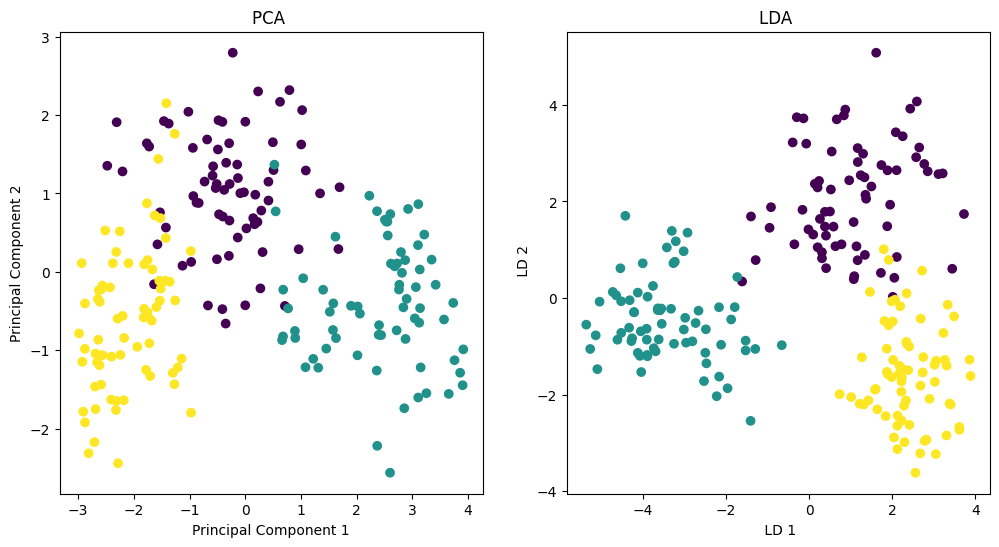

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(norm_samples)

#LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(norm_samples, labels)

#PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('PCA ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


#LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:,0],X_lda[:,1], c=labels)
plt.title('LDA ')
plt.xlabel(' LD 1')
plt.ylabel(' LD 2')

plt.show()

Η PCA απεικονίζει τα δεδομένα με βάση τη μεγιστοποίηση της διακύμανσης. Η PCA επικεντρώνεται στο να βρει τις κατευθύνσεις (ή 'συνιστώσες') στον χώρο των χαρακτηριστικών όπου τα δεδομένα εμφανίζουν τη μέγιστη διαφοροποίηση χωρίς απαραίτητα να λαμβάνεται υπόψη η διαχωριστική ικανότητα μεταξύ των διαφορετικών κλάσεων.

Aπό την άλλη στην LDA, οι συστάδες τείνουν να είναι όσο το δυνατόν πιο διαχωρίσιμες και απομακρυνσμένες καθώς όπως αναφέραμε η LDA απεικονίζει τα δεδομένα με στόχο τη βελτιστοποίηση της διαχωριστικότητας μεταξύ των κλάσεων .


Η PCA και η LDA παράγουν πολύ διαφορετικές απεικονίσεις επειδή έχουν διαφορετικούς στόχους. Η PCA αναζητά απλώς κατευθύνσεις μεγάλης διακύμανσης, ανεξάρτητα από τις κλάσεις των δεδομένων, και έτσι μπορεί να μην αναδείξει τόσο καθαρά το διαχωρισμό μεταξύ των κλάσεων. Αντίθετα, η LDA χρησιμοποιεί τις ετικέτες των κλάσεων για να βρει έναν χώρο όπου οι κλάσεις είναι όσο το δυνατόν πιο διακριτές , συμπαγείς και απομακρυνσμένες.

### **Ερώτημα 4**

Η LDA παράγει έναν πίνακα προβολής που δείχνει ποια χαρακτηριστικά συνεισφέρουν περισσότερο στη διάκριση μεταξύ των κλάσεων. Τα χαρακτηριστικά με τις μεγαλύτερες απόλυτες τιμές στον πίνακα προβολής είναι εκείνα που συνεισφέρουν περισσότερο. Μπορούμε να δημιουργήσουμε δισδιάστατες απεικονίσεις χρησιμοποιώντας αυτά τα χαρακτηριστικά για να δούμε πώς τα δεδομένα διαχωρίζονται στο χώρο των δύο κύριων διαστάσεων που επιλέξαμε.

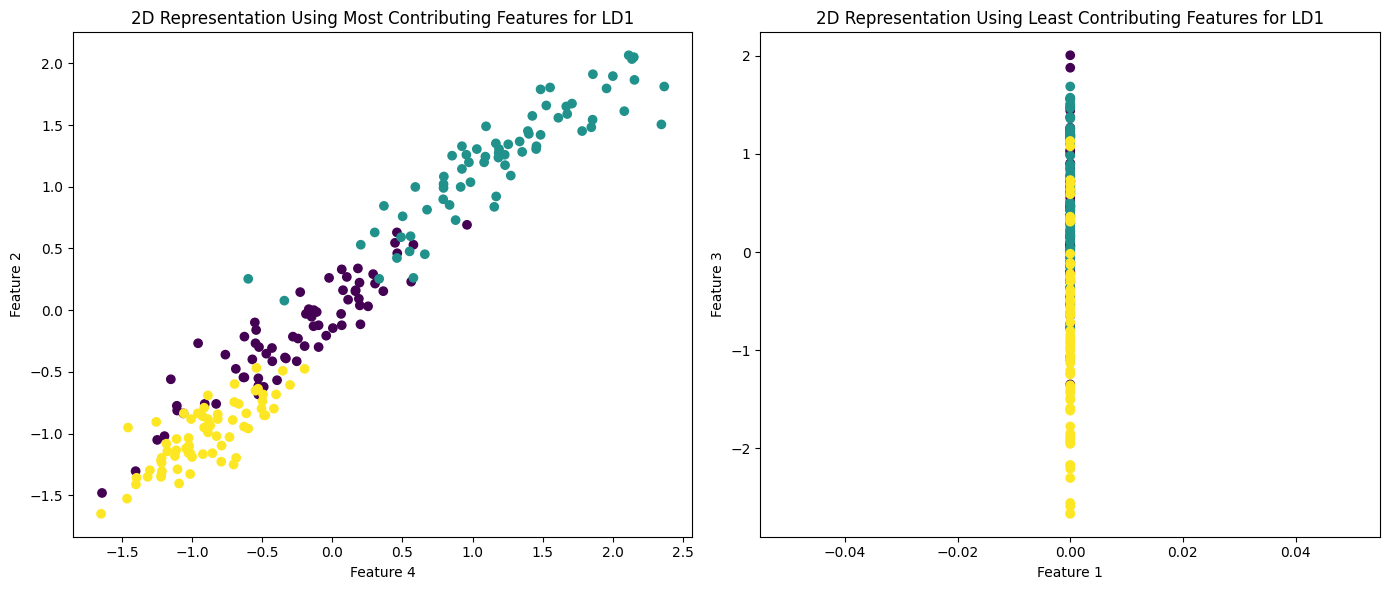

In [15]:

# Extract the LDA coefficients (scalings) for each feature
lda_coefficients = lda.scalings_

# Sort the coefficients by their absolute values and get the indices of the features
sorted_indices = np.argsort(np.abs(lda_coefficients), axis=0)

# Identify the features that contribute the most and the least to class separation
#We are considering the first two LDA components (LD1 and LD2)
most_contributing_features = sorted_indices[-2:, :]
least_contributing_features = sorted_indices[:2, :]


# Plot two-dimensional representations using the most and least contributing features
plt.figure(figsize=(14, 6))

# Most contributing features for LD1
plt.subplot(1, 2, 1)
plt.scatter(norm_samples[:, most_contributing_features[0, 0]], norm_samples[:, most_contributing_features[1, 0]], c=labels)
plt.title('2D Representation Using Most Contributing Features for LD1')
plt.xlabel(f'Feature {most_contributing_features[0, 0] + 1}')
plt.ylabel(f'Feature {most_contributing_features[1, 0] + 1}')

# Least contributing features for LD1
plt.subplot(1, 2, 2)
plt.scatter(norm_samples[:, least_contributing_features[0, 0]], norm_samples[:, least_contributing_features[1, 0]], c=labels)
plt.title('2D Representation Using Least Contributing Features for LD1')
plt.xlabel(f'Feature {least_contributing_features[0, 0] + 1}')
plt.ylabel(f'Feature {least_contributing_features[1, 0] + 1}')


plt.tight_layout()
plt.show()



Στο πρώτο διάγραμμα απεικονίζεται η 2D αναπαράσταση χρησιμοποιώντας τα χαρακτηριστικά που συνεισφέρουν περισσότερο στη διάκριση των κλάσεων για την πρώτη συνιστώσα της LDA (LD1).

Η διακριτική δύναμη αυτών των δύο χαρακτηριστικών φαίνεται καλή, καθώς τα δεδομένα διαχωρίζονται σχετικά καθαρά σε ομάδες. Υπάρχει μία σύγχυση αλλά ο διαχωρισμός των κλάσεων είναι εμφανής  και σχετικά πετυχημένος  γεγονός που επιβεβαιώνει ότι χρησιμοποιώντας αυτά τα 2 χαρακτηριστικά μπορούμε να οδηγηθούμε σε μια  αποτελεσματική και αντοπροσωπευτική της αλήθειας, διάκριση των κλάσεων .

Απο την άλλη , στο 2ο διάγραμμα έχουμε μια 2D αναπαράσταση χρησιμοποιώντας τα χαρακτηριστικά που συνεισφέρουν λιγότερο στη διάκριση των κλάσεων για την ίδια συνιστώσα (LD1). Εδώ παρατηρούμε ότι τα δεδομένα συγκεντρώνονται πάνω σε μία ευθέια γραμμή , και επικαλύπτουν το 1 το άλλο . Δεν υπάρχει σαφής διαχωρισμός των 3 κλάσεων , μάλιστα η μωβ κλάση έχει υπερκαυφθεί στο διάγραμμα από τις άλλες 2 . Αυτό επιβεβαιώνει ότι τα συγκεκριμένα χαρακτηριστικά δεν είναι αποτελεσματικά για την διάκριση μεταξύ των διαφόρων κλάσεων στα δεδομένα .




## **Άσκηση 4**

### **Ερώτημα 1**

Ο Classical MDS είναι μια τεχνική μείωσης διαστάσεων που χρησιμοποιείται για την ανάλυση δεδομένων αποστάσεων ή ομοιότητας. Σκοπός του είναι να αναπαραστήσει τα δεδομένα σε έναν χώρο με λιγότερες διαστάσεις, διατηρώντας όσο το δυνατόν πιο πιστά τις αρχικές αποστάσεις.

Μετά από την ιδιοανάλυση του πίνακα αποστάσεων , τα πρώτα d ιδιοδιανύσματα είναι η διανυσματική αναπαράσταση των δεδομένων σε έναν χώρο d-διαστάσεων .

Χρησιμοποιώντας την απόσταση μεταξύ πόλεων, θα εφαρμόσουμε τον MDS για να πάρουμε μια διανυσματική αναπαράσταση των πόλεων σε 2 και 3 διαστάσεις.
Στη συνέχεια, θα δημιουργήσουμε διαγράμματα που απεικονίζουν αυτές τις αναπαραστάσεις, παρέχοντας έτσι μια οπτική εικόνα των σχέσεων αποστάσεων μεταξύ των πόλεων.

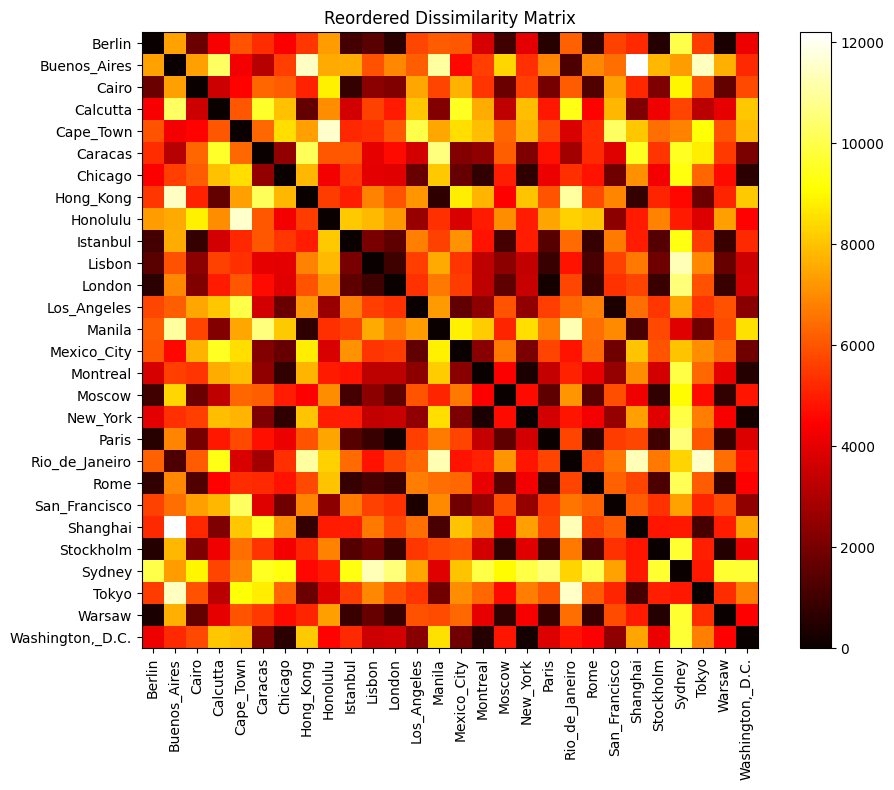

In [55]:
from sklearn.manifold import MDS

City_names_world = np.loadtxt("City_names_world.txt" , dtype='str')
Distance_Matrix_world = np.loadtxt("Distance_Matrix_world.txt")

# Plotting the dissimilarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(Distance_Matrix_world, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Reordered Dissimilarity Matrix')
plt.xticks(ticks=np.arange(len(City_names_world)), labels=City_names_world, rotation=90)
plt.yticks(ticks=np.arange(len(City_names_world)), labels=City_names_world)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


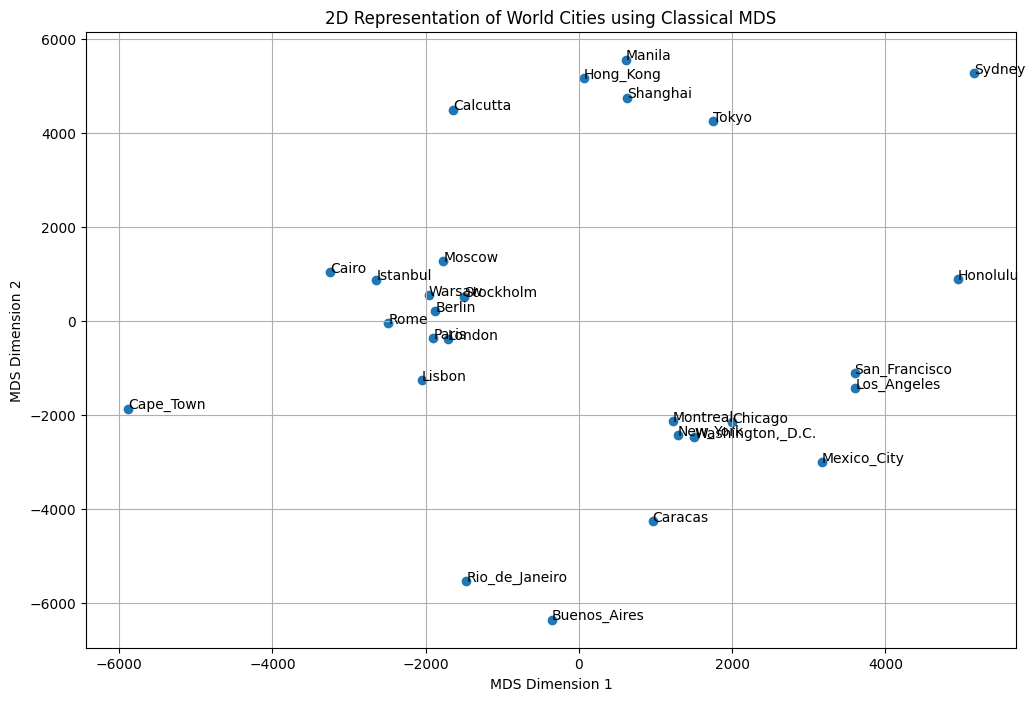

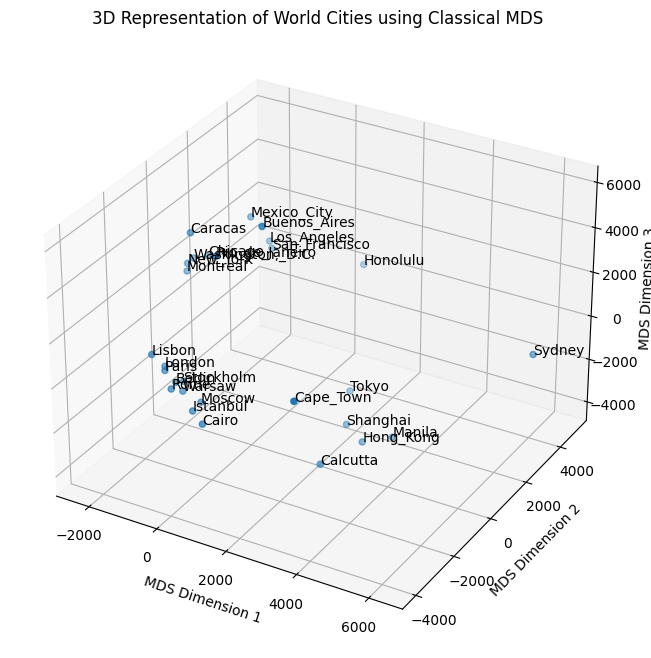

In [57]:

# Perform Classical Multidimensional Scaling (MDS) using Distance Matrix
# For 2D representation
mds_2d = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
coords_2d = mds_2d.fit_transform(Distance_Matrix_world)

# For 3D representation
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=0)
coords_3d = mds_3d.fit_transform(Distance_Matrix_world)

# Plotting the 2D representation
plt.figure(figsize=(12, 8))
plt.scatter(coords_2d[:, 0], coords_2d[:, 1])
for label, x, y in zip(City_names_world, coords_2d[:, 0], coords_2d[:, 1]):
    plt.annotate(label, (x, y))
plt.title('2D Representation of World Cities using Classical MDS')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

# Plotting the 3D representation
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords_3d[:, 0], coords_3d[:, 1], coords_3d[:, 2])
for label, x, y, z in zip(City_names_world, coords_3d[:, 0], coords_3d[:, 1], coords_3d[:, 2]):
    ax.text(x, y, z, label)
ax.set_title('3D Representation of World Cities using Classical MDS')
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
plt.show()



Διάγραμμα 2 Διαστάσεων (2D): Στο διάγραμμα 2 διαστάσεων, οι πόλεις φαίνονται να είναι τοποθετημένες σε μια επίπεδη επιφάνεια με τρόπο που αντανακλά τις αποστάσεις μεταξύ τους. Οι πόλεις που είναι γεωγραφικά κοντά φαίνονται να είναι κοντά και στο διάγραμμα, ενώ εκείνες που είναι πιο μακριά φαίνονται να απέχουν περισσότερο.

Διάγραμμα 3 Διαστάσεων (3D): Στο διάγραμμα 3 διαστάσεων, η τρισδιάστατη αναπαράσταση προσφέρει μια πιο πλούσια οπτική εικόνα των αποστάσεων, καθώς προσθέτει μια επιπλέον διάσταση για την πιο ακριβή απεικόνιση των σχεσιακών διαφορών μεταξύ των πόλεων. Πιο συγκεκριμένα , βλέπουμε ότι οι συστάδες των πόλεων ίσως τείνουν να μιμηθούν την θέση των πόλεων γεωγραφικά στην γή , συγκριτικά με την προηγούμενη υλοποίηση βλέπουμε μία καλύτερη τοποθέτηση των ομάδων - ηπείρων , αλλά και πάλι όχι τόσο κοντά στην πραγματικότητα. Γενικά , οι συστάδες φαίνεται να είναι πιο συμπυκνωμένες και ταυτόχρονα πιο καλά διαχωρισμένες / απομακρυνσμενες .

Από αυτά τα διαγράμματα, είναι φανερό ότι η προσθήκη διάστασης βοηθάει στην καλύτερη αναπαράσταση των αποστάσεων. Συνεπώς, η απόφαση για το πόσες διαστάσεις είναι οι βέλτιστες θα πρέπει να ληφθεί με βάση την ανάλυση των ιδιοτιμών όπως συζητήθηκε προηγουμένως.

### **Ερώτημα 2**

Στο MDS, οι διαστάσεις αναπαράστασης αναφέρονται στον αριθμό των διαστάσεων που χρησιμοποιούνται για να απεικονίσουν τα δεδομένα. Οι ιδιοτιμές του πίνακα YY.T δίνουν πληροφορίες για τη σημαντικότητα κάθε διάστασης.
Οι σημαντικές ιδιοτιμές υποδηλώνουν πόσες διαστάσεις παρέχουν σημαντική πληροφορία και πόσες μπορούν να αγνοηθούν χωρίς σημαντική απώλεια πληροφορίας.

Αφού εκτελέσουμε τον MDS με τις μέγιστες διαστάσεις, θα υπολογίσουμε τον πίνακα ΥΥ.Τ
Ακολούθως, θα υπολογίσουμε τις ιδιοτιμές του πίνακα και θα τις ταξινομήσουμε σε φθίνουσα σειρά.
Το διάγραμμα των ιδιοτιμών θα μας δείξει πόσες διαστάσεις είναι σημαντικές. Οι πρώτες διαστάσεις με τις μεγαλύτερες ιδιοτιμές είναι οι πιο σημαντικές.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


The eigenvalues are: 
 [2.35339833e+08 1.49210119e+08 8.72224886e+07 7.33033260e+02
 2.01023481e+02 1.45391020e+02 1.09757579e+02 9.29095932e+01
 5.25625188e+01 4.09553394e+01 3.12501130e+01 2.71866790e+01
 1.44896201e+01 1.14981185e+01 8.22222068e+00 7.03523651e+00
 5.78547240e+00 4.16432909e+00 3.88299312e+00 2.83942365e+00
 1.48686428e+00 5.53772420e-01 4.71072494e-01 3.43534491e-01
 8.48428339e-02 6.31440593e-02 9.89435479e-04 1.24654598e-09]


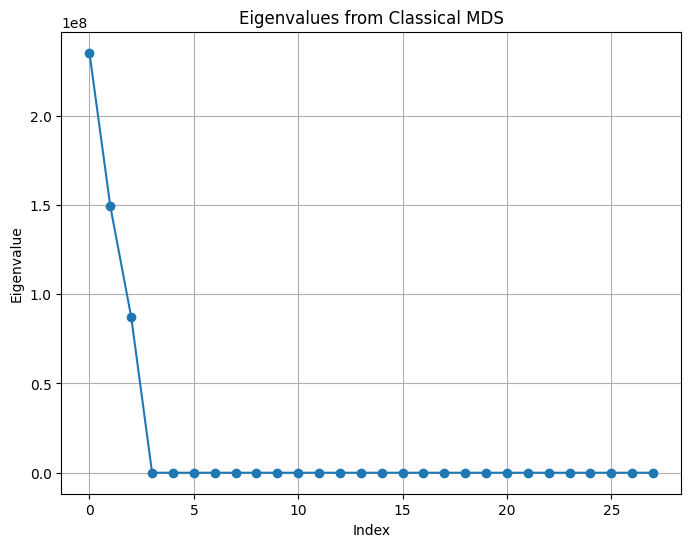

In [17]:

# Maximum dimension for classical MDS is N-1 where N is the number of samples
max_dim = Distance_Matrix_world.shape[0] - 1

# Classical MDS with maximum dimension
mds_max = MDS(n_components=max_dim, dissimilarity='precomputed', random_state=0)
Y = mds_max.fit_transform(Distance_Matrix_world)  # Use fit_transform to get the MDS results

# Calculate the Gramian matrix (matrix of inner products) Y*Y.T
T = np.dot(Y, Y.T)

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(T)

# Sort the eigenvalues in descending order
eigenvalues = np.sort(eigenvalues)[::-1]
print("The eigenvalues are: \n" , eigenvalues)

# Plotting the eigenvalues

plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, 'o-')
plt.title('Eigenvalues from Classical MDS')
plt.xlabel('Index') #index from eigenvalues
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()




Από το διάγραμμα των ιδιοτιμών, μπορούμε να παρατηρήσουμε την ταχεία πτώση στις πρώτες τρεις ιδιοτιμές, με την τρίτη ιδιοτιμή να είναι πολύ μικρότερη από τη δεύτερη. Αυτό υποδηλώνει ότι οι δύο πρώτες διαστάσεις κατέχουν τη συντριπτική πλειοψηφία της διακύμανσης στα δεδομένα.

Η τρίτη ιδιοτιμή, ενώ είναι σημαντικά μικρότερη από τις δύο πρώτες, εξακολουθεί να είναι πολύ μεγαλύτερη από τις επόμενες, πράγμα που δείχνει ότι μια τρισδιάστατη αναπαράσταση θα κατέχει περισσότερη πληροφορία σε σχέση με μια δισδιάστατη, αλλά μετά την τρίτη διάσταση, η προσθήκη περαιτέρω διαστάσεων δεν προσφέρει σημαντική βελτίωση.

Επομένως, μπορούμε να κάνουμε την εξής εκτίμηση:

Οι δύο πρώτες διαστάσεις είναι οι πιο σημαντικές και διατηρούν την πλειοψηφία της πληροφορίας των αποστάσεων μεταξύ των πόλεων.

Η τρίτη διάσταση ενώ φέρει λιγότερη πληροφορία σε σχέση με τις πρώτες δύο, συνεισφέρει στην ακρίβεια της αναπαράστασης.

Προσθέτοντας περισσότερες διαστάσεις από την τρίτη και μετά δεν προσφέρουν σημαντική πληροφορία και ίσως να προκύψει υπερπροσαρμογή (overfitting) στα δεδομένα.

Βάσει αυτών των παρατηρήσεων, οι βέλτιστες διαστάσεις για την αναπαράσταση των δεδομένων από το αρχείο Distance_Matrix_world φαίνεται να είναι τρεις. Αυτό σημαίνει ότι μια τρισδιάστατη αναπαράσταση θα πρέπει να διατηρήσει τις περισσότερες από τις σημαντικές πληροφορίες της δομής των αποστάσεων μεταξύ των πόλεων.

### **Ερώτημα Bonus**

Σε αυτό το ερώτημα θα προσπαθήσουμε να εξηγήσουμε για ποιόν όγο υπάρχουν μη μηδενικές ιδιοτιμές για περισσότερες των 3 διαστάσεων . Θα συγκρίνουμε τα παραπάνω με το αντίστοιχο διάγραμμα απο τα δεδομένα του αρχείου Distance_Matrix_US

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


The eigenvalues are: 
 [ 1.62413063e+07  3.58042310e+06  5.43687640e+04  2.94403980e+04
  9.13674708e+03  4.98367619e+03  3.58733521e+03  2.28378141e+03
  1.89408039e+03  1.35635720e+03  1.12106361e+03  7.59423647e+02
  5.79424085e+02  4.18727525e+02  3.45350537e+02  2.95058733e+02
  2.40846969e+02  2.18226486e+02  1.27052672e+02  9.37629992e+01
  5.22819498e+01  4.88569754e+01  2.57777329e+01  1.85569760e+01
  1.75014186e+01  3.46977861e+00  1.68129575e+00 -6.63149472e-11]


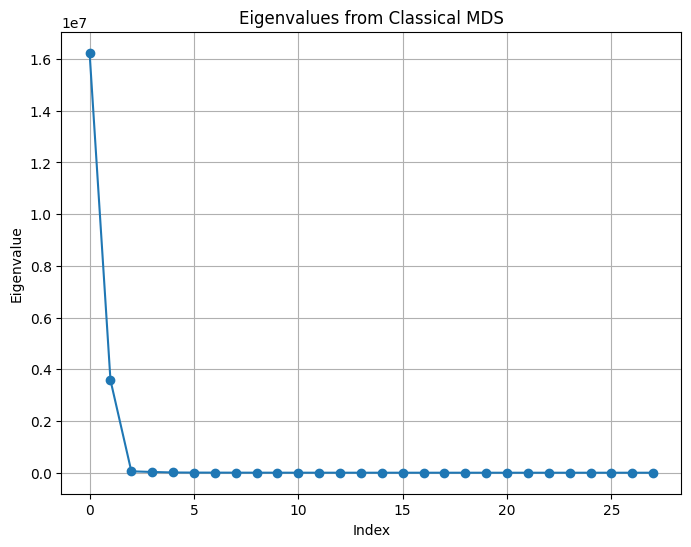

In [56]:

Distance_Matrix_US = np.loadtxt("Distance_Matrix_US.txt")

# Maximum dimension for classical MDS is N-1 where N is the number of samples
max_dim = Distance_Matrix_US.shape[0] - 1

# Classical MDS with maximum dimension
mds_max = MDS(n_components=max_dim, dissimilarity='precomputed', random_state=0)
Y = mds_max.fit_transform(Distance_Matrix_US)  # Use fit_transform to get the MDS results

# Calculate the Gramian matrix (matrix of inner products) Y*Y.T
T = np.dot(Y, Y.T)

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(T)

# Sort the eigenvalues in descending order
eigenvalues = np.sort(eigenvalues)[::-1]
print("The eigenvalues are: \n" , eigenvalues)

# Plotting the eigenvalues

plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, 'o-')
plt.title('Eigenvalues from Classical MDS')
plt.xlabel('Index') #index from eigenvalues
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


Οι μη μηδενικές ιδιοτιμές στην περίπτωση που χρησιμοποιούμε τις πολιτείες της αμερικής , βλέπουμε ότι διατηρούν αρκετά μεγάλες τιμές, απέχουν πολύ απο τις μηδενικές, μετά την 2η διάσταση .
Γνωρίζουμε οτι η χρήση επιπλέον ιδιοτιμών και άρα διαστάσεων προσθέτει επιπλέον πληροφορία . Ακόμα και εαν ο MDS καταφέρει να διαχωρίζει όπως είδαμε στο 1ο ερώτημα τις ηπείρους μεταξύ τους , βλέπουμε ότι υπάρχει μία σύγχυση μεταξύ των χωρών μέσα σε  αυτές, παρατηρούμε χώρες να πέφτουν η μία πάνω στην άλλη και γενικότερα να μην διακρίνονται καλά οι αποστάσεις εντός των ομάδων .

Ίσως η επιλογή περισσοτέρων ιδιοτιμών να δίνει επιπλέον πληροφορία σχετικά με τις αποστάσεις και τις γεωγραφικές θέσεις των χωρών εντός των ηπείρων . Για χώρες που βρίσκονται πολύ κοντά γεωγραφικά , συγκρτικά με τα μεγέθη των αποστάσεων αυτών απο άλλες ηπείρους , είναι πιθανό οι πληροφορία των 3 διαστάσεων να μην επαρκεί για να τις διαχωρίσει αναλόγως .  
